# Which counties in Germany have alot of vehicles registered per inhabitant?

In this project, the objective was to investigate the correlation between the population size and the number of registered vehicles in German counties. The primary focus was to identify counties with a high vehicle-to-inhabitant ratio. By identifying such counties, the German government can prioritize improvements in public transportation infrastructure, thereby offering more environmentally friendly transportation options to a larger population. Adding to that, a second analysis was conducted focusing on the bus-to-inhabitant ratio, aiming to assess the existing state of public transportation in the respective counties. This analysis provides further insights into the availability and adequacy of bus services, shedding light on the level of accessibility and convenience for residents relying on public transportation options.

To achieve this goal, data from Mobilithek was utilized regarding the number of vehicles per county (https://mobilithek.info/offers/-8395690728355365851) and supplemented it with an additional dataset containing information about the population size per county (https://downloads.suche-postleitzahl.org/v2/public/plz_einwohner.csv).

## Install dependencies

In [19]:
%pip install pandas
%pip install sqlite3
%pip install matplotlib
%pip install numpy
%pip install scipy

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


ERROR: Invalid requirement: "'SQLAlchemy==1.4.46'"


Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import sqlite3 as sq
import numpy as np
from scipy.stats import pearsonr


## Load the data from the Database into a DataFrame

### Query the data needed for the data analysis
Once the necessary dependencies have been installed, it is possible to execute a query on the data as they are stored in the SQLite database and store the results in a dataframe.

In [21]:
conn = sq.connect('C:/Users/ideapad 330s/OneDrive/Desktop/Studium/Data Engineering/2023-amse-template_LSc/data/data.sqlite')

df = pd.read_sql_query("SELECT DISTINCT County, Inhabitants, [Registered Vehicles], [Registered Buses] FROM result", conn)

df.head(10)

,County,Inhabitants,Registered Vehicles,Registered Buses
0,Aachen,236442,0,0
1,Altenkirchen (Westerwald),8672,85341,378
2,Altötting,12449,72851,125
3,Amberg,43381,25239,44
4,Ansbach,39510,153747,239
5,Aschaffenburg,67367,162367,244
6,Augsburg,267780,309773,597
7,Aurich,40871,119751,221
8,Bad Dürkheim,18321,92141,128
9,Bad Kissingen,21005,71609,140


### Set up the Data for the exploratory analysis and initiate important variables
The newly created dataframe is now being customized to meet the requirements for plotting. Furthermore, several useful variables are being generated to enhance the visual appeal of the plots.

In [22]:
# Filter out "-" and null-values
filtered_df = df[df["Registered Vehicles"].notnull() & (df["Registered Vehicles"] != "-") & df["Registered Buses"].notnull() & (df["Registered Buses"] != "-") & df["Inhabitants"].notnull() & (df["Inhabitants"] != "-")] # Filter out non-integers and NULLs, we do this in this step as otherwise we would need to store a '0' in our DB 

# Calculate the max-values
max_registered_vehicles = filtered_df["Registered Vehicles"].astype(int).max()
max_inhabitants = filtered_df["Inhabitants"].astype(int).max()

# Calulate the axis-ticks
num_ticks = 10 

x_ticks_pkw = list(range(0, max_registered_vehicles + 1, max_registered_vehicles // num_ticks))
x_ticks_Buses = list(range(0, filtered_df["Registered Buses"].astype(int).max() + 1, filtered_df["Registered Buses"].astype(int).max() // num_ticks))

y_ticks = list(range(0, max_inhabitants + 1, max_inhabitants // num_ticks))

### Data exploration
Here we print out some useful information about the now filtered dataframe.

In [23]:
filtered_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 241 entries, 0 to 240
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   County               241 non-null    object
 1   Inhabitants          241 non-null    int64 
 2   Registered Vehicles  241 non-null    int64 
 3   Registered Buses     241 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 7.7+ KB


### Generating Plot for PKW Data
In the following analysis, we will examine the relationship between the number of registered vehicles (Pkw) and the population size in various counties in Germany. By presenting a graph illustrating this relationship and providing a list of the top 10 counties with the highest ratio of registered vehicles per inhabitant, the aim is to shed light on transportation patterns and infrastructure across different regions.

This investigation is motivated by the importance of understanding the correlation between population size and vehicle ownership. By studying the distribution of registered Pkw per capita, we can gain valuable insights into the transportation landscape and identify counties where interventions and strategies may be necessary to optimize public transportation services and promote eco-friendly transportation alternatives.

As we delve into the graphs and the list of counties with the highest ratio of Pkw per inhabitant, we will uncover valuable information that can guide policymakers and stakeholders in making informed decisions towards a more efficient and sustainable transportation system.

Text(0.95, 0.85, 'Lowest Pkw per Inhabitant: Aachen (0.00)')

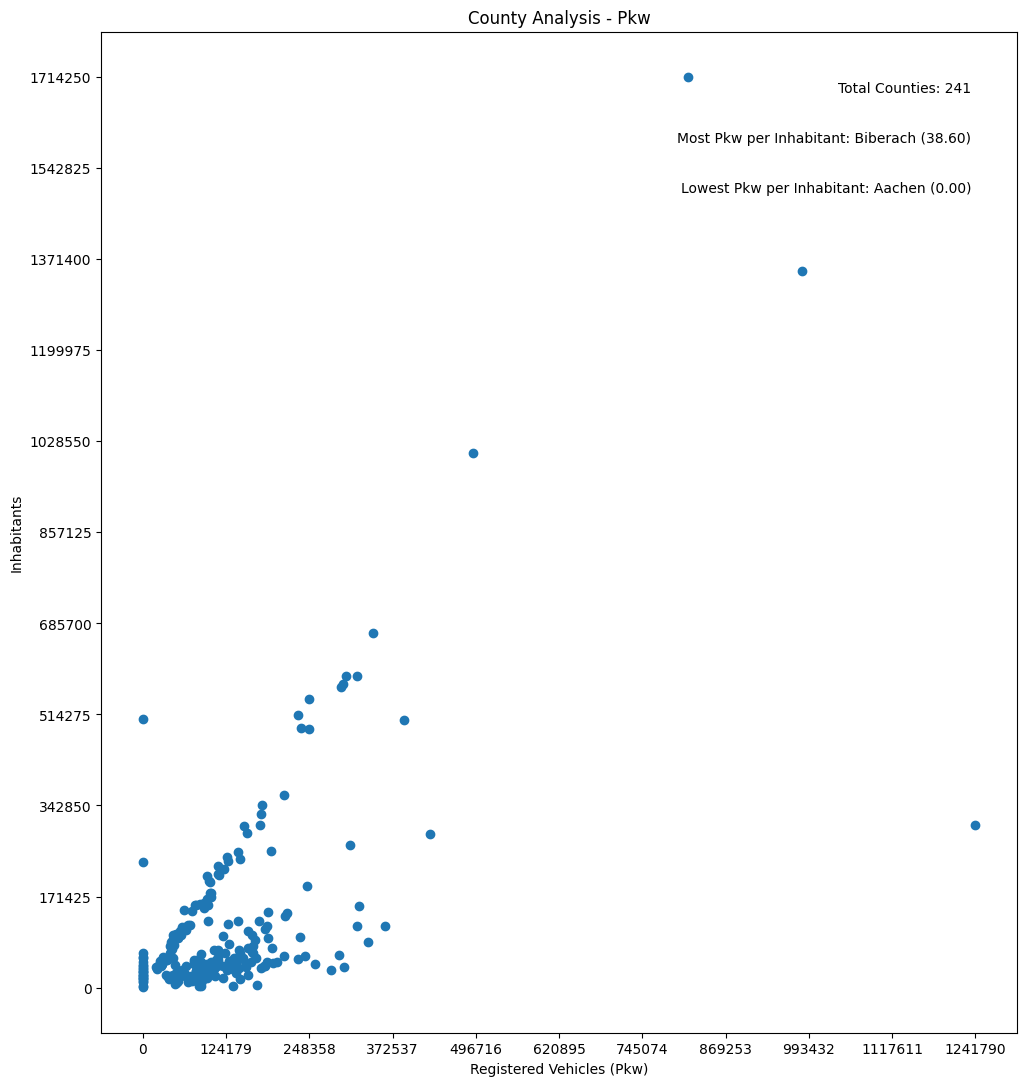

In [24]:
# Plot the counties inhabitants and their amount of registered vehicles
plt.figure(figsize=(26, 13))
plt.subplot(1, 2, 1)
plt.scatter(filtered_df["Registered Vehicles"].astype(int), filtered_df["Inhabitants"].astype(int))
plt.xlabel("Registered Vehicles (Pkw)")
plt.ylabel("Inhabitants")
plt.title("County Analysis - Pkw")
plt.xticks(x_ticks_pkw)
plt.yticks(y_ticks)
plt.ticklabel_format(style="plain")
total_points_pkw = len(filtered_df)
plt.text(0.95, 0.95, f"Total Counties: {total_points_pkw}", transform=plt.gca().transAxes, ha='right', va='top')
highest_ratio_county_pkw = filtered_df.loc[(filtered_df["Registered Vehicles"].astype(int) / filtered_df["Inhabitants"].astype(int)) == (filtered_df["Registered Vehicles"].astype(int) / filtered_df["Inhabitants"].astype(int)).max(), "County"].iloc[0]
highest_ratio_value_pkw = (filtered_df["Registered Vehicles"].astype(int) / filtered_df["Inhabitants"].astype(int)).max()
lowest_ratio_county_pkw = filtered_df.loc[(filtered_df["Registered Vehicles"].astype(int) / filtered_df["Inhabitants"].astype(int)) == (filtered_df["Registered Vehicles"].astype(int) / filtered_df["Inhabitants"].astype(int)).min(), "County"].iloc[0]
lowest_ratio_value_pkw = (filtered_df["Registered Vehicles"].astype(int) / filtered_df["Inhabitants"].astype(int)).min()
plt.text(0.95, 0.90, f"Most Pkw per Inhabitant: {highest_ratio_county_pkw} ({highest_ratio_value_pkw:.2f})", transform=plt.gca().transAxes, ha='right', va='top')
plt.text(0.95, 0.85, f"Lowest Pkw per Inhabitant: {lowest_ratio_county_pkw} ({lowest_ratio_value_pkw:.2f})", transform=plt.gca().transAxes, ha='right', va='top')


In [33]:
# Calculate Registered Vehicles / Inhabitants
filtered_df.loc[:, "Registered Vehicles / Inhabitants"] = filtered_df["Registered Vehicles"] / filtered_df["Inhabitants"]
top_10_counties_pkw = filtered_df.nlargest(10, "Registered Vehicles / Inhabitants")
top_10_counties_pkw = top_10_counties_pkw[["County", "Registered Vehicles / Inhabitants"]]

# Print it out
print("Top 10 Counties - Vehicles (Pkw) per Inhabitant:")
print(top_10_counties_pkw.to_string(index=False))
correlation, p_value = pearsonr(filtered_df["Registered Vehicles"], filtered_df["Inhabitants"])
print()
print("Correlation between Registered Vehicles (Pkw) & Inhabitants")
print("Correlation coefficient:", correlation)
print("P-value:", p_value)

Top 10 Counties - Vehicles (Pkw) per Inhabitant:
                   County  Registered Vehicles / Inhabitants
                 Biberach                          38.601714
               Heidenheim                          34.345295
                Steinburg                          31.945873
                  Harburg                          31.346890
                Oldenburg                          12.099098
Altenkirchen (Westerwald)                           9.840982
               Miltenberg                           9.607798
                 Diepholz                           9.025261
                Steinfurt                           8.400418
                 Mettmann                           7.888302

Correlation between Registered Vehicles (Pkw) & Inhabitants
Correlation coefficient: 0.6695308650759194
P-value: 1.0483485167769133e-32


#### Results
The plot reveals a discernible correlation between the population size of a county and the number of registered vehicles. As the number of inhabitants increases on the Y-axis, there is a corresponding rise in the count of registered vehicles on the X-axis. However, the correlation appears to be less than 1, suggesting that the growth rate of vehicles does not align proportionally with the population. This implies that while more inhabitants generally result in more vehicles, the ratio of vehicles to inhabitants diminishes as county populations increase.
To confirm these assumptions, statistical calculations are performed.They draw a pretty clear picture of confirming the assumptions. The correlation coefficient of 0.6695 indicates a moderate positive correlation between the number of registered vehicles and the number of inhabitants in the counties. The very small p-value suggests that this correlation is unlikely to have occurred by chance, further supporting the conclusion that there is a significant relationship between the variables.

#### Challenges
Additionally, upon closer examination of the data, it becomes apparent that the reported value of 38.6 vehicles per person for the county "Biberach" is likely erroneous. As a resident of a neighboring county, I can confirm that the average number of vehicles owned by individuals in Biberach is not as high as 38. Consequently, a reevaluation of the data was necessary. It was discovered that the county data differentiated between "subcounties" based on ZIP codes, whereas the vehicle data only accounted for real German counties (Landkreise). Merging the two datasets resolved the issue of subcounties but led to the loss of their specific data. Furthermore, the "Biberach" problem arises from the division in one dataset of the county into "Biberach" and "Biberach an der Riß" with the first representing the county and the other denoting the city itself, while the other dataset only used "Biberach" (the county name). While merging counties with a shared "core name" would seem feasible, it presents challenges when dealing with counties distinguished by additional specifications (e.g., Erlangen and Erlangen-Höchststadt). Merging such counties would result in data pollution, as they are not intended to be combined. Therefore there is no real solution to automatically clean the counties if they are not joined together perfectly.

When printing the top 10 counties with the highest ratio of vehicles per inhabitant, it becomes evident that the data is generally polluted and requires further scrutiny.

### Generating Plot for Bus Data
In the following analysis, we will examine the relationship between the number of registered buses and the population size in different counties across Germany. By presenting graphs that illustrate this relationship and providing a list of the top 10 counties with the highest ratio of registered buses per inhabitant, we aim to gain insights into the public transportation landscape and assess the availability and usage of buses as a mode of transport.

This investigation is driven by the need to understand the prevalence of public transport, particularly buses, in different regions. By studying the distribution of registered buses per capita, we can explore the extent to which counties prioritize and invest in public transportation services. Understanding this relationship is crucial for evaluating the effectiveness of public transport networks and identifying areas where improvements may be necessary.

The analysis of the bus data will also allow us to assess the potential correlation between population size and the availability of buses. By examining the variation in the number of registered buses across counties with different population sizes, we can identify trends and patterns that may indicate the level of investment and infrastructure dedicated to public transportation.

Text(0.95, 0.85, 'Lowest Buses per Inhabitant: Aachen (0.00)')

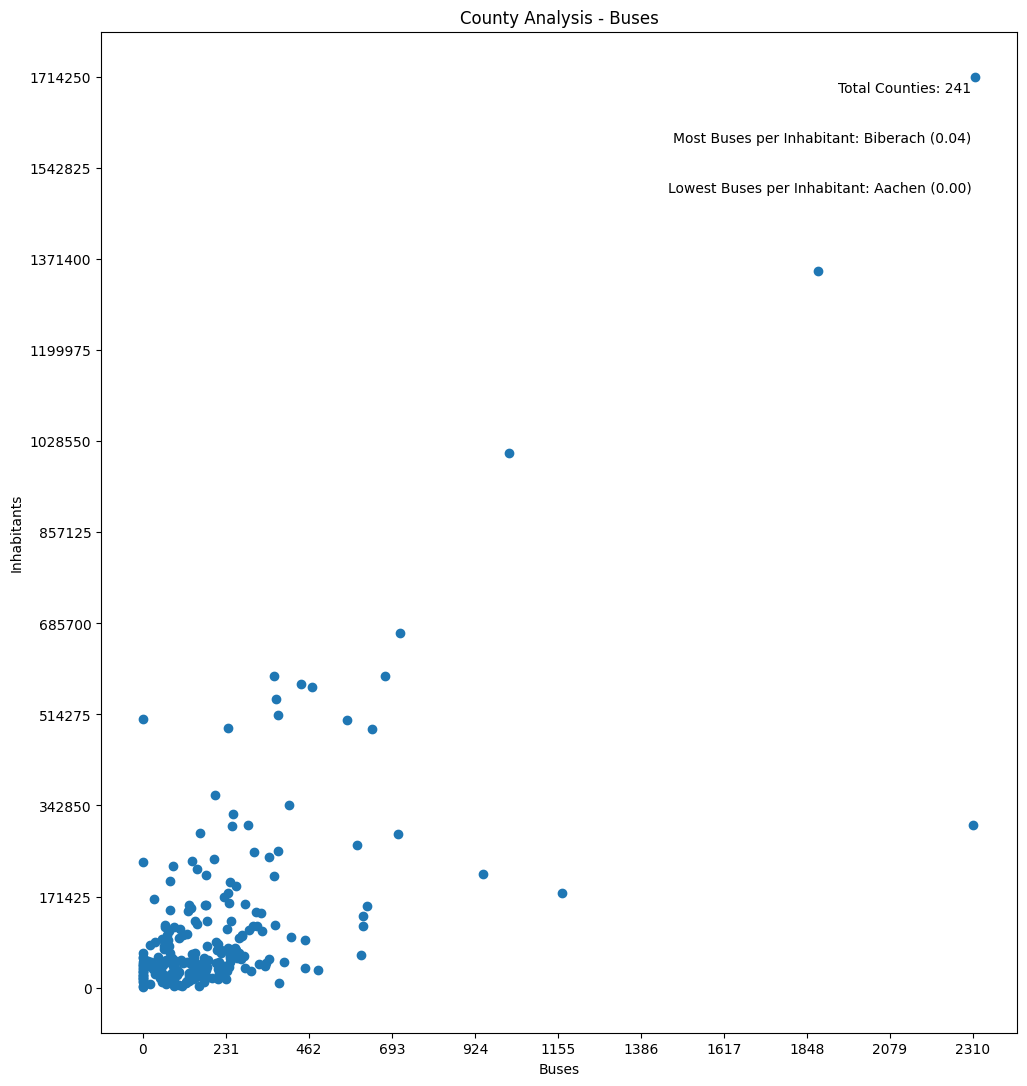

In [26]:
# Plot the counties inhabitants and their amount of registered vehicles
plt.figure(figsize=(26, 13))
plt.subplot(1, 2, 2)
plt.scatter(filtered_df["Registered Buses"].astype(int), filtered_df["Inhabitants"].astype(int))
plt.xlabel("Buses")
plt.ylabel("Inhabitants")
plt.title("County Analysis - Buses")
plt.xticks(x_ticks_Buses)
plt.yticks(y_ticks)
plt.ticklabel_format(style="plain")
total_points_Buses = len(filtered_df)
plt.text(0.95, 0.95, f"Total Counties: {total_points_Buses}", transform=plt.gca().transAxes, ha='right', va='top')
highest_ratio_county_Buses = filtered_df.loc[(filtered_df["Registered Buses"].astype(int) / filtered_df["Inhabitants"].astype(int)) == (filtered_df["Registered Buses"].astype(int) / filtered_df["Inhabitants"].astype(int)).max(), "County"].iloc[0]
highest_ratio_value_Buses = (filtered_df["Registered Buses"].astype(int) / filtered_df["Inhabitants"].astype(int)).max()
lowest_ratio_county_Buses = filtered_df.loc[(filtered_df["Registered Buses"].astype(int) / filtered_df["Inhabitants"].astype(int)) == (filtered_df["Registered Buses"].astype(int) / filtered_df["Inhabitants"].astype(int)).min(), "County"].iloc[0]
lowest_ratio_value_Buses = (filtered_df["Registered Buses"].astype(int) / filtered_df["Inhabitants"].astype(int)).min()
plt.text(0.95, 0.90, f"Most Buses per Inhabitant: {highest_ratio_county_Buses} ({highest_ratio_value_Buses:.2f})", transform=plt.gca().transAxes, ha='right', va='top')
plt.text(0.95, 0.85, f"Lowest Buses per Inhabitant: {lowest_ratio_county_Buses} ({lowest_ratio_value_Buses:.2f})", transform=plt.gca().transAxes, ha='right', va='top')

In [31]:
# Calculate Registered Buses / Inhabitants
filtered_df.loc[:, "Registered Buses / Inhabitants"] = filtered_df["Registered Buses"] / filtered_df["Inhabitants"]
top_10_counties_buses = filtered_df.nlargest(10, "Registered Buses / Inhabitants")
top_10_counties_buses = top_10_counties_buses[["County", "Registered Buses / Inhabitants"]]

# Print it out
print("Top 10 Counties - Buses per Inhabitant:")
print(top_10_counties_buses.to_string(index=False))

correlation, p_value = pearsonr(filtered_df["Registered Buses"], filtered_df["Inhabitants"])
print()
print("Correlation between Registered Buses & Inhabitants")
print("Correlation coefficient:", correlation)
print("P-value:", p_value)

Top 10 Counties - Buses per Inhabitant:
                   County  Registered Buses / Inhabitants
                 Biberach                        0.044857
Altenkirchen (Westerwald)                        0.043589
                Steinburg                        0.041459
               Heidenheim                        0.035088
                  Harburg                        0.018771
                Ebersberg                        0.015418
                  Kelheim                        0.015148
                Steinfurt                        0.014587
               Miltenberg                        0.013180
                 Diepholz                        0.013131

Correlation between Registered Buses & Inhabitants
Correlation coefficient: 0.7132689567282635
P-value: 9.283068344589747e-39


#### Results
The results for buses present a less conclusive picture compared to vehicles. Without performing statistical calculations, it is challenging to make a definitive statement about any existing correlation. It appears that there might be a positive correlation between the number of inhabitants and the registered buses, but the data points exhibit obvious variation, raising doubts about the statistical significance of this correlation.
But again this assumptions needed to be proven by statistics. The correlation coefficient of 0.7133 indicates a strong positive correlation between the number of registered buses per inhabitant in the top 10 counties. This means that as the number of inhabitants increases, the number of registered buses per inhabitant also tends to increase. The p-value of 9.2831e-39 provides, depite the previous doubts, strong evidence for correlation, indicating that this relationship is highly unlikely to have occurred by chance. 

#### Challenges
Although the values for buses seem more within a normal range, with 0.04 buses per inhabitant being not excessively high, it is likely that these data are also polluted. The top 10 counties for buses show a similar pattern as the top 10 counties for vehicles (similar counties), indicating a potential contamination issue in the data. Additionally, the persisting "Biberach" problem further reinforces the notion that the data cannot be accurate due to improper integration into the database.

In [44]:
filtered_df["Registered Vehicles / Registered Buses"] = filtered_df["Registered Vehicles"] / filtered_df["Registered Buses"]

# Create a copy of the filtered DataFrame to avoid the SettingWithCopyWarning Error
filtered_df_copy = filtered_df.copy()

# Calculate the ratio of (Registered Vehicles / Registered Buses) divided by Inhabitants
filtered_df_copy["Ratio Cars to Buses per Inhabitant"] = filtered_df_copy["Registered Vehicles / Registered Buses"] / filtered_df_copy["Inhabitants"]
filtered_df_copy = filtered_df_copy.replace([np.inf, -np.inf, np.nan], np.nan)
filtered_df_copy = filtered_df_copy.dropna(subset=["Ratio Cars to Buses per Inhabitant"])

# Sort the DataFrame by the ratio in descending order and get the top 10 counties
top_10_counties_ratio = filtered_df_copy.nlargest(10, "Ratio Cars to Buses per Inhabitant")

# Print the top 10 counties list
print("Top 10 Counties - Ratio of Cars to Buses per Inhabitant:")
print(top_10_counties_ratio[["County", "Ratio Cars to Buses per Inhabitant"]].to_string(index=False))

# Calculate the correlation and p-value
correlation, p_value = pearsonr(filtered_df_copy["Registered Vehicles / Registered Buses"], filtered_df_copy["Inhabitants"])

# Print the correlation and p-value
print()
print("Correlation of the Cars to Buses per Inhabitant")
print("Correlation coefficient:", correlation)
print("P-value:", p_value)



Top 10 Counties - Ratio of Cars to Buses per Inhabitant:
                    County  Ratio Cars to Buses per Inhabitant
                Heidenheim                            0.390287
                     Kusel                            0.369557
                   Harburg                            0.307322
                 Steinburg                            0.295795
                  Biberach                            0.245871
                 Oldenburg                            0.186140
                  Miesbach                            0.113131
Neustadt an der Weinstraße                            0.106359
                Miltenberg                            0.080065
              Sankt Wendel                            0.069892

Correlation of the Cars to Buses per Inhabitant
Correlation coefficient: -0.12070086124386821
P-value: 0.0760205404250345


#### Results
The focus of these top 10 counties is to determine which counties have the highest ratio of cars to busses per person. These specific counties could be particularly receptive to modernization efforts and the expansion of public transportation, as this ratio serves as an indicator of the limited availability of buses compared to private cars.
The correlation coefficient of the ratio of registered cars to registered buses per inhabitant is approximately -0.1207. This indicates a weak negative correlation between the number of cars and the number of buses per inhabitant in the counties. As the ratio of registered cars to registered buses per inhabitant increases, it suggests a lower concentration of buses relative to cars.
The p-value associated with the correlation is 0.0760, which is somewhat likely (though not statistically significant at a conventional significance level of 0.05). This suggests that the observed correlation could be due to chance, but there is still a possibility of a meaningful relationship between the variables. The negative correlation implies that as the population size increases, the ratio of registered cars to registered buses tends to decrease. This suggests that in counties with larger populations, there tends to be a relatively lower number of cars compared to buses per inhabitant.
It seems as the population grows, there may be a greater reliance on public transportation (buses) compared to individual car ownership. However, it is important to consider that the correlation is weak, and other factors not considered in this analysis could influence the relationship. 

#### Challenges
Although new counties emerge in this list, deviating from the previously observed counties with excessively high values, it is likely that these values are also subject to contamination.

# Implications & Conclusion
## Implications
The findings of the data pipeline project indicate that the German government should pay particular attention to counties with a high rate of vehicles per capita, as well as the number of registered buses, in order to enhance public transportation services and promote eco-friendliness. Understanding the underlying factors contributing to high vehicle and bus ownership in these counties is crucial for developing targeted strategies and initiatives. Through comprehensive research and analysis, policymakers can address the observed correlations and devise effective measures to reduce reliance on private vehicles and encourage sustainable transportation alternatives.

The decision to examine the number of registered buses stems from the objective of assessing the availability and extent of public transportation in different counties. Buses are a primary mode of public transport, and analyzing their registration rates per inhabitant provides insights into the level of public transport infrastructure and accessibility in a particular county. By studying the correlation between population size and registered buses, policymakers can gauge the effectiveness of existing public transport systems and identify areas where improvements are needed.

Focusing on counties with high vehicle and low bus rates can yield significant benefits in terms of improving public transportation services and reducing carbon emissions. By allocating resources and implementing tailored measures, the government can enhance the availability, accessibility, and affordability of public transport options in these areas. It is essential to consider the unique needs and preferences of residents in these counties to ensure that proposed solutions effectively address their transportation requirements.

Moreover, collaboration with local authorities, transport companies, and community organizations is vital for achieving meaningful outcomes. By actively involving stakeholders and engaging in dialogue, the government can gain valuable insights into the specific challenges faced by each county. This collaborative approach will facilitate the development of comprehensive and sustainable solutions that align with the priorities and aspirations of the local population.

Overall, the data highlights the importance of targeting counties with high vehicle and bus rates as a key strategy in improving public transport and advancing eco-friendliness. By understanding the factors driving vehicle and bus ownership in these counties and implementing targeted interventions, the German government can make significant progress towards achieving a more sustainable and efficient transportation system, benefiting both residents and the environment.

## Conclusion
Despite the valuable insights obtained from the data analysis, it is crucial to acknowledge the presence of data contamination, which compromises the accuracy and reliability of the results. The contamination stems from inconsistent naming conventions and granularity of counties in the two data sources, leading to incomplete and unreliable data.

To fulfill the project's objective of identifying counties with high vehicle and bus rates per inhabitant for optimizing public transportation and promoting eco-friendly transportation options, addressing the issue of data contamination is of utmost importance. Further steps should be taken to reconcile the inconsistencies in county names and granularity between the data sources, ensuring a more accurate and trustworthy dataset for informed decision-making.

In conclusion, while the analysis provides insights into the correlations between population size and the number of registered vehicles and buses, the presence of contaminated data necessitates careful validation and refinement before drawing any definitive recommendations. The examination of registered buses specifically contributes to understanding the state of public transportation infrastructure and its impact on transportation patterns and eco-friendliness in different counties.